# Lab Instructions

Create 3 visualizations from a spatial and time-series dataset of your choice.  Describe your dataset including where it came from and the features it contains.  Each visualization should be accompanied by at least 1 - 2 sentences explaining how the features do (or do not!) change over time and througout space.

# Lab 3.5: Visualizing Relationships in Space and Time

**Goal:** Create 3 visualizations from a dataset that has both space and time.
We will use a water-quality dataset (sites across time) and make:
1. A **trend over time** plot
2. A **spatial comparison** plot
3. A **space + time** plot

In [81]:
# bringing in pandas + numpy for data stuff
import pandas as pd
import numpy as np

# using plotly express since it makes quick charts
import plotly.express as px

In [83]:
# file path (my local copy from course assets)
data_path = r"C:\Users\MasterDanteDev86\Downloads\SIM3032-O Data Visualization and Modeling - Online\Data_Visualization_And_Modeling-main\Lecture\Week 3\assets\BKB_WaterQualityData_2020084.csv"

# data_path = "assets/BKB_WaterQualityData_2020084.csv"

# Read the CSV
df = pd.read_csv(data_path)

# quick peek to make sure it loaded
df.head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.0,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.6,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.6,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.7,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.0,1994


# Dataset Description

- **Source:** Course Week 3 assets (water quality) from the following url: https://www.kaggle.com/datasets/sahirmaharajj/water-quality-data.
- **Spatial feature(s):** `Site_Id` indicates the sampling location (e.g., Bay, A, B, C, D).
- **Temporal feature(s):** `Read_Date` gives the sampling date (and there is a `Year` column).
- **Measurements (examples):** `Dissolved Oxygen (mg/L)`, `pH (standard units)`,
  `Secchi Depth (m)`, `Water Temp (?C)`, `Salinity (ppt)`, and air temperature fields.

This dataset is appropriate for the lab because it contains **both space (sites)** and **time (dates/years)** and has **multiple features** across **hundreds of rows**.

In [86]:
# making a backup just in case i mess something up
df_raw = df.copy()

# fix column names (remove spaces and weird symbols)
new_cols = []
for name in df.columns:
    temp = name.strip().replace(" ", "_").replace("(", "").replace(")", "")
    temp = temp.replace("?C", "C")
    new_cols.append(temp)
df.columns = new_cols

# turn Read_Date into real datetime format
df["Read_Date"] = pd.to_datetime(df["Read_Date"], errors="coerce")

# some sites had lowercase d, just fixing it to uppercase
df["Site_Id"] = df["Site_Id"].replace({"d": "D"})

# making a year+month column (can help with grouping later)
df["YearMonth"] = df["Read_Date"].dt.to_period("M").astype(str)

# make sure numbers are numeric (if not, convert or set as NaN)
num_cols = ["Dissolved_Oxygen_mg/L", "pH_standard_units", "Secchi_Depth_m", 
            "Water_Depth_m", "Water_Temp_C", "Salinity_ppt"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# check dataset size + sites
(df.shape, sorted(df["Site_Id"].dropna().unique()))


((2371, 18), ['A', 'B', 'Bay', 'C', 'D'])

C:\Users\MasterDanteDev86\AppData\Local\Temp\ipykernel_2992\2308291747.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



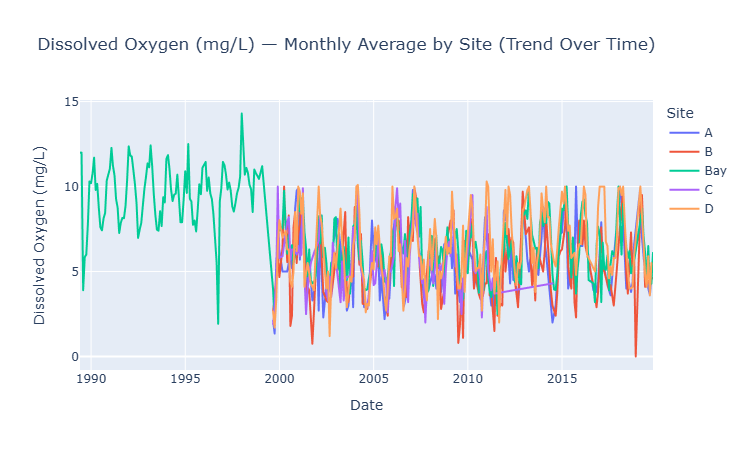

In [88]:
# look at Dissolved Oxygen trend over time (monthly avg makes it smoother)
temp1 = df.dropna(subset=["Read_Date", "Site_Id", "Dissolved_Oxygen_mg/L"]).copy()

# group by site + month, then average
monthly = (
    temp1
    .groupby(["Site_Id", pd.Grouper(key="Read_Date", freq="M")])["Dissolved_Oxygen_mg/L"]
    .mean()
    .reset_index()
    .rename(columns={"Dissolved_Oxygen_mg/L": "DO_mgL"})
)

# line chart, different color for each site
fig = px.line(
    monthly,
    x="Read_Date",
    y="DO_mgL",
    color="Site_Id",
    title="Dissolved Oxygen (mg/L) — Monthly Average by Site (Trend Over Time)",
    labels={"Read_Date": "Date", "DO_mgL": "Dissolved Oxygen (mg/L)", "Site_Id": "Site"}
)
fig.update_layout(height=450)
fig.show()


**Interpretation (Time Trend):**  
Dissolved Oxygen shows clear variation through time. Some sites stay clustered together while others rise or dip in different months.  
Overall, the monthly lines let us see seasonal-like waves and longer-term shifts rather than noisy day-to-day points.

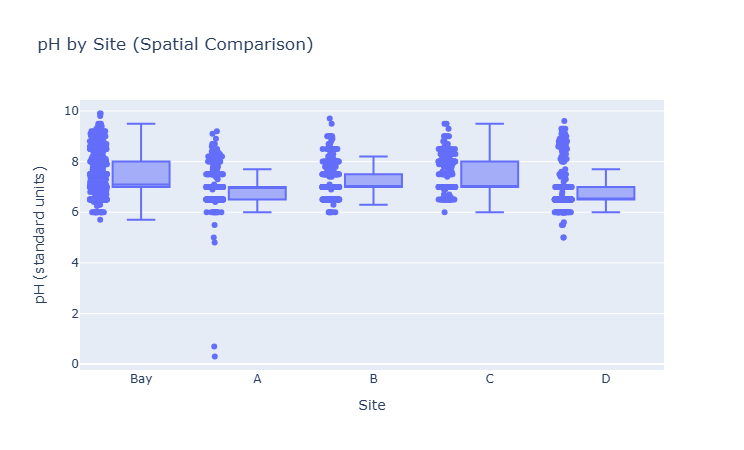

In [91]:
# compare pH values across sites
temp2 = df.dropna(subset=["Site_Id", "pH_standard_units"]).copy()

# boxplot shows spread + median, with all points included
fig = px.box(
    temp2,
    x="Site_Id",
    y="pH_standard_units",
    points="all",               # keep dots so we see each data point
    title="pH by Site (Spatial Comparison)",
    labels={"Site_Id": "Site", "pH_standard_units": "pH (standard units)"}
)
fig.update_layout(height=450)
fig.show()

**Interpretation (Spatial):**  
Sites differ in their pH distributions. Some locations have slightly higher typical pH values,  
while others show wider spread or more extreme points. This indicates spatial variation in water conditions.

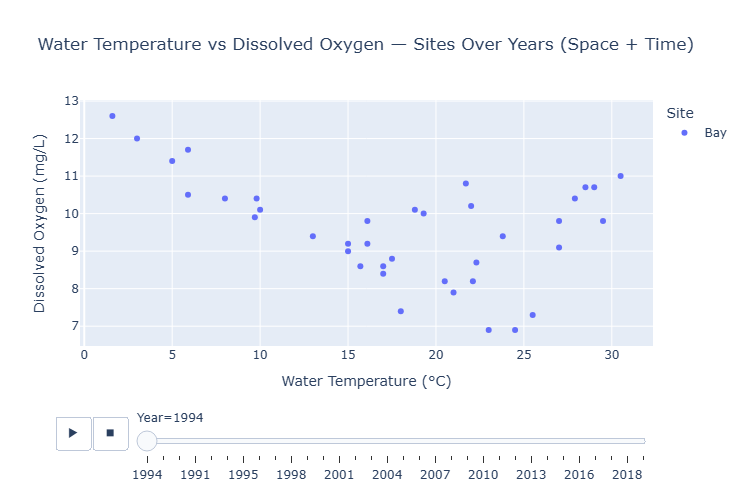

In [94]:
# relationship between water temp and dissolved oxygen
# color = site, animate = year
needed = ["Site_Id", "Year", "Water_Temp_C", "Dissolved_Oxygen_mg/L"]
avail = [c for c in needed if c in df.columns]
temp3 = df.dropna(subset=avail).copy()

# scatter plot, animation by year
fig = px.scatter(
    temp3,
    x="Water_Temp_C",
    y="Dissolved_Oxygen_mg/L",
    color="Site_Id",
    animation_frame="Year",
    hover_data=["Site_Id"],
    title="Water Temperature vs Dissolved Oxygen — Sites Over Years (Space + Time)",
    labels={
        "Water_Temp_C": "Water Temperature (°C)",
        "Dissolved_Oxygen_mg/L": "Dissolved Oxygen (mg/L)",
        "Site_Id": "Site",
        "Year": "Year"
    }
)
fig.update_layout(height=500)
fig.show()

**Interpretation (Space + Time):**  
Across years, points for different sites shift position on the plot.  
Warmer water tends to align with lower dissolved oxygen (a known physical pattern),  
and the amount of change from year to year varies by site.  
This figure shows **both** spatial differences (color/site) and temporal change (animation by year).

# Conclusion

This dataset clearly combines **space** (sampling sites) and **time** (dates/years).
- **Trend plot:** highlighted monthly changes in dissolved oxygen through time.
- **Spatial plot:** showed pH distributions differ by site.
- **Space + Time plot:** revealed how the temperature–oxygen relationship changes by site across years.